# Objective/Overview

The objective of this project is to use neural network with keras to solve regression problem in Python and R. This project was originally done in Python in _Deep Learning with Keras_, from Antonio Gulli and Sujit Pal, Keras regression example - predicting benzene levels in the air. Here we redo this project in Python.

This section executes blue part of the project flow shown in the figure below in R.
<p></p>

![](image/mproj_keras_regression_airquality.png)


<p></p> 
* In previous section (in R shown in purple in figure above), we downloaded the data from web and did some basic cleaning.
* In this section, we do the following
  - Load the data which was processed in previous section
  - Scale the variables (response and features)
  - Split the sample in 70-30 for training and testing
  - Define the model with one hidden layer and one output layer. The output layer has no activation function because it is regression problem.
  - Run the model and predict for testing
  - Meausre the performance with MSE and some visualization
  
## Links

Following are the links for the code and report generated

Relates to purple part of the project (see figure above).
  - [Report in R](mproj_keras_regression_airquality_1_basic.html)
  - [Code as Rmd file](mproj_keras_regression_airquality_1_basic.Rmd) (executed in Rstudio)

Relates to blue part of the project (see figure above).
  - [Report in R](mproj_keras_regression_airquality_2_keras.html)
  - [Code as Rmd file](mproj_keras_regression_airquality_2_keras.Rmd) (executed in Rstudio)
  - [Report in Python](mproj_regression_airquality.html) (This page!)
  - [Code in Python](mproj_regression_airquality.ipynb) (executed in Jupyter)

## Data source: 

Courtesy of https://archive.ics.uci.edu/ml/datasets/Air+Quality

# Load Libraries

In [1]:
from keras.layers import Input
from keras.layers.core import Dense
from keras.models import Model
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

C:\Users\mahes\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Read and Split the Data

The following reads the clean data processed in previous section.

In [2]:
DATA_DIR = "c:/ds_local/dataset/"
AIRQUALITY_FILE = os.path.join(DATA_DIR, "AirQualityUCI_cleaned.csv")
aqdf = pd.read_csv(AIRQUALITY_FILE, sep=",", decimal=".", header=0)
# remove first and last 2 cols
#del aqdf["Date"]
#del aqdf["Time"]
#del aqdf["Unnamed: 15"]
#del aqdf["Unnamed: 16"]
# fill NaNs in each column with the mean value
#aqdf = aqdf.fillna(aqdf.mean())
df_data = aqdf.as_matrix()

In [3]:
type(df_data)

numpy.ndarray

scale the variable as, $ z= {{x-\mu}\over{\sigma}} $

In [4]:
scaler = StandardScaler()
trn = scaler.fit_transform(df_data)
# store these off for predictions with unseen data
Xmeans = scaler.mean_
Xstds = scaler.scale_
y_trn = trn[:, 3]
x_trn = np.delete(trn, 3, axis=1)

In [5]:
# split the train and test size as 70:30
train_size = int(0.7 * trn.shape[0])
x_trn_tr, x_trn_te, y_trn_tr, y_trn_te = x_trn[0:train_size], x_trn[train_size:],y_trn[0:train_size], y_trn[train_size:]

# Defining the model

* Layer 1: Input layer = No of features = 12
* Layer 2: Hidden layer = 8 (data compression like PCA but non-linear)
* Layer 3: output layer = 1. No activation as response is regression.

In [6]:
## This code works, but written smartly, but I prefer dumb code which is in next cell block
#readings = Input(shape=(12,))
#x = Dense(8, activation="relu", kernel_initializer="glorot_uniform")(readings)
#benzene = Dense(1, kernel_initializer="glorot_uniform")(x)
#model = Model(inputs=[readings], outputs=[benzene])
#model.compile(loss="mse", optimizer="adam")

In [7]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
model = Sequential()
model.add(Dense(8,input_shape=(12,), kernel_initializer="glorot_uniform"))

#, output_dim=8, kernel_initializer="glorot_uniform"))
model.add(Activation('relu'))
model.add(Dense(units=1, kernel_initializer="glorot_uniform")) # output_dim=1
model.compile(loss="mse", optimizer="adam")

In [8]:
NUM_EPOCHS = 20
BATCH_SIZE = 10
history = model.fit(x_trn_tr, y_trn_tr, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS,
validation_split=0.2)

Train on 5239 samples, validate on 1310 samples
Epoch 1/20
5239/5239 [==============================] - 2s 306us/step - loss: 0.1553 - val_loss: 0.0407
Epoch 2/20
5239/5239 [==============================] - 1s 218us/step - loss: 0.0163 - val_loss: 0.0162
Epoch 3/20
5239/5239 [==============================] - 1s 159us/step - loss: 0.0076 - val_loss: 0.0080
Epoch 4/20
5239/5239 [==============================] - 1s 146us/step - loss: 0.0044 - val_loss: 0.0052
Epoch 5/20
5239/5239 [==============================] - 1s 164us/step - loss: 0.0030 - val_loss: 0.0039
Epoch 6/20
5239/5239 [==============================] - 1s 193us/step - loss: 0.0022 - val_loss: 0.0033
Epoch 7/20
5239/5239 [==============================] - 1s 192us/step - loss: 0.0018 - val_loss: 0.0029
Epoch 8/20
5239/5239 [==============================] - 1s 189us/step - loss: 0.0016 - val_loss: 0.0024
Epoch 9/20
5239/5239 [==============================] - 1s 189us/step - loss: 0.0013 - val_loss: 0.0022
Epoch 10/20
5239

NameError: name 'y_prd' is not defined

In [13]:
y_prd = model.predict(x_trn_te).flatten()
y_trn_te_unscaled = (y_trn_te * Xstds[3]) + Xmeans[3]
y_prd_unscaled = (y_prd * Xstds[3]) + Xmeans[3]

for i in range(10):
    y_true_i= (y_trn_te[i] * Xstds[3]) + Xmeans[3]
    y_prd_i = (y_prd[i] * Xstds[3]) + Xmeans[3]
    print("Benzene Conc. expected: {:.3f}, predicted: {:.3f}".format(y_true_i, y_prd_i))


Benzene Conc. expected: 4.600, predicted: 6.386
Benzene Conc. expected: 5.500, predicted: 6.913
Benzene Conc. expected: 6.500, predicted: 6.673
Benzene Conc. expected: 10.300, predicted: 9.685
Benzene Conc. expected: 8.900, predicted: 8.595
Benzene Conc. expected: 14.000, predicted: 14.071
Benzene Conc. expected: 9.200, predicted: 9.138
Benzene Conc. expected: 8.200, predicted: 8.673
Benzene Conc. expected: 7.200, predicted: 7.823
Benzene Conc. expected: 5.500, predicted: 6.206


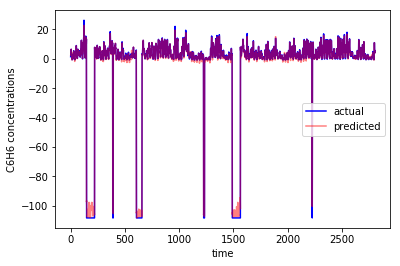

In [14]:
plt.plot(np.arange(y_trn_te.shape[0]), (y_trn_te * Xstds[3]) / Xmeans[3],color="b", label="actual")
plt.plot(np.arange(y_prd.shape[0]), (y_prd * Xstds[3]) / Xmeans[3], color="r", alpha=0.5, label="predicted")
plt.xlabel("time")
plt.ylabel("C6H6 concentrations")
plt.legend(loc="best")
plt.show()

In [15]:
import math
math.sqrt(sum((y_trn_te_unscaled-y_prd_unscaled)**2))/len(y_trn_te_unscaled)
#(y_trn_te_unscaled-y_prd_unscaled)


0.05112992795684173